#some imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

#read data and clean it

In [2]:
path="/content/sample_data/Job titles and industries.csv"
data = pd.read_csv(path)
data.drop_duplicates(inplace=True)
data = data.rename(columns={'job title': 'job_title'})
data.head()

,job_title,industry
0,technical support and helpdesk supervisor - co...,IT
1,senior technical support engineer,IT
2,head of it services,IT
3,js front end engineer,IT
4,network and telephony controller,IT


# plot indusdry count

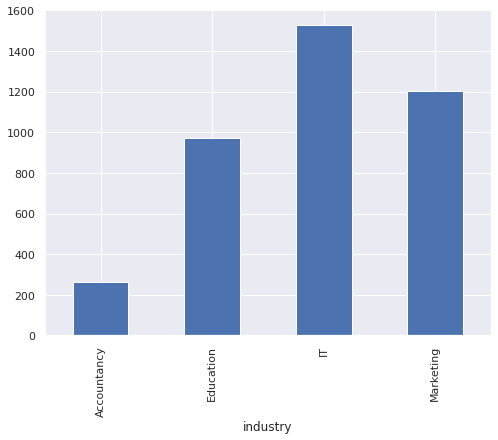

In [3]:
fig = plt.figure(figsize=(8,6))
data.groupby('industry').job_title.count().plot.bar(ylim=0)
plt.show()

# suffle the data

In [4]:
from sklearn.utils import shuffle,resample
data = shuffle(data,random_state=42)
x=data.job_title
y=data.industry

#add a column encoding the industry as an integer because categorical variables are often better represented by integers than strings.

In [5]:
from io import StringIO
col = ['job_title','industry']
data = data[col]
data['category_id'] = data['industry'].factorize()[0]
category_id_data = data[['industry', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_data.values)
id_to_category = dict(category_id_data[['category_id', 'industry']].values)



# measure Term Frequency, Inverse Document Frequency

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
features = tfidf.fit_transform(data.job_title).toarray()
labels = data.industry
features.shape

(3968, 2045)

#Model Selection
# benchmark the following four models:


*   Logistic Regression
*   (Multinomial) Naive Bayes

*  Linear Support Vector Machine
*   Random Forest








In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(random_state=42,class_weight='balanced'),
    MultinomialNB(),
    LogisticRegression(random_state=42,class_weight='balanced'),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])



#plot cross validation accuracy

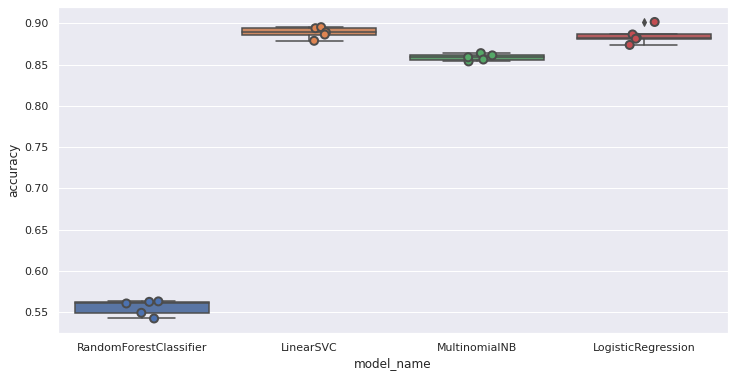

In [8]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [9]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.888858
LogisticRegression        0.885329
MultinomialNB             0.858871
RandomForestClassifier    0.555442
Name: accuracy, dtype: float64

# we see according to accuarcy Linear SVC is the best one so  we choose it 